# Activation Maps (Feature Maps)

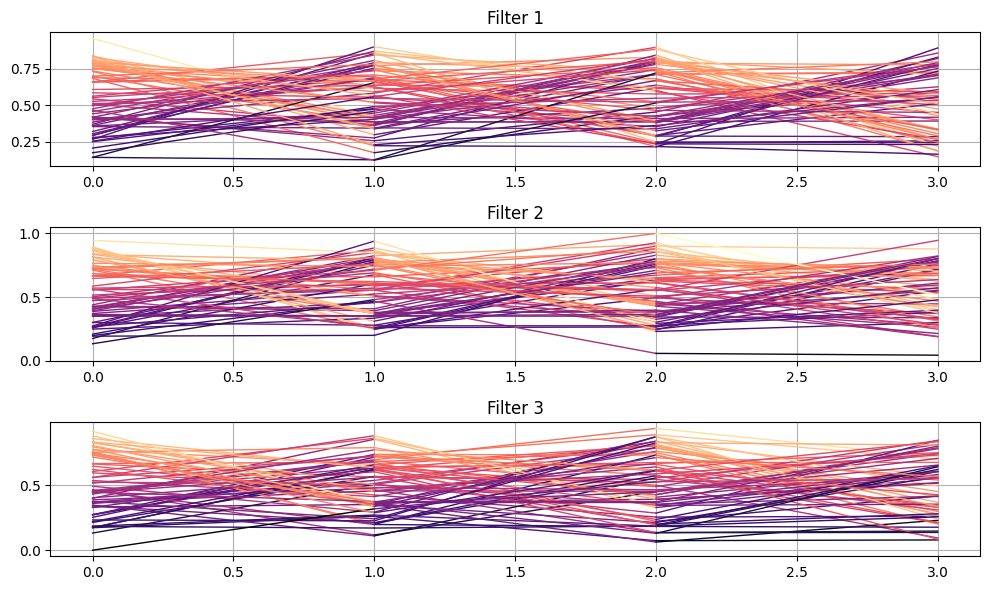

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your model
model = load_model('CNN_no_early.keras')

# Get the filters from a specific Conv1D layer (adjust layer name as per your model)
layer_name = 'conv1d'
layer = model.get_layer(name=layer_name)
filters, biases = layer.get_weights()

# Normalize filter values between 0 and 1 for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Plot the filters
n_filters, filter_length, input_channels = filters_normalized.shape
n_filters_to_plot = min(n_filters, 3)
fig, axs = plt.subplots(n_filters_to_plot, figsize=(10, 6))


# Color map
#   Sequential Colormaps: viridis, plasma, inferno, cividis, magma.
#   Diverging Colormaps: coolwarm, bwr, seismic, RdBu.
#   Qualitative Colormaps: tab10, Pastel1, Set3, Dark2.
cmap = plt.get_cmap('magma')

for i in range(n_filters_to_plot):
    ax = axs[i]
    for c in range(input_channels):
        weight_values = filters_normalized[i, :, c]
        colors = cmap(weight_values) 
        for j in range(filter_length - 1):
            ax.plot([j, j+1], [weight_values[j], weight_values[j+1]], color=colors[j], linewidth=1)
            
    ax.set_title(f'Filter {i+1}')
    ax.grid(True)

plt.tight_layout()
plt.show()


# Saliency Maps

In [2]:
input_sequence = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0],
                           [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1],
                           [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1],
                           [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1],
                           [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1],
                           [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1],
                           [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0],
                           [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1],
                           [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1],
                           [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0],
                           [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0],
                           [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1],
                           [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0],
                           [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0],
                           [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0],
                           [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0],
                           [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0],
                           [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0],
                           [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0],
                           [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],
                           [0, 0, 0, 1], [0, 0, 0, 1]
                           ])

In [67]:
import numpy as np

# Create arrays for each sequence
ones = np.full(22, 1.0)
eights = np.full(6, 0.9)
sixes = np.full(19, 1.0)
fours = np.full(6, 0.9)
twos = np.full(8, 1.0)
zeros = np.full(21, 0.9)

# Concatenate all arrays into one
element_labels = np.concatenate([ones, eights, sixes, fours, twos, zeros])


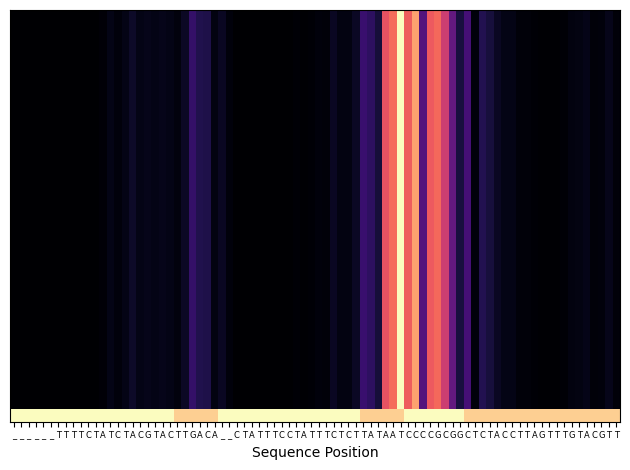

In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load your CNN model
model = tf.keras.models.load_model('CNN_no_early.keras')

# Function to generate saliency map for DNA sequence
def generate_saliency_map(model, input_sequence, target_class_index):
    input_tensor = tf.convert_to_tensor(input_sequence[np.newaxis, ...], dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        loss = predictions[0, target_class_index]
        
    gradients = tape.gradient(loss, input_tensor)
    
    # Normalize gradients
    gradients = tf.norm(gradients, axis=-1)
    gradients = gradients / tf.reduce_max(gradients)
    
    return gradients.numpy()


target_class_index = 0
saliency = generate_saliency_map(model, input_sequence, target_class_index)

mapping = {(1,0,0,0) : 'A', (0,1,0,0) : 'C', (0,0,1,0) : 'G', (0,0,0,1) : 'T', (0,0,0,0) : '_'}
x_labels = [mapping[tuple(each)] for each in input_sequence]
saliency = np.vstack([saliency for i in range(30)])
result = np.vstack([saliency, element_labels])

plt.imshow(result, cmap='magma', aspect='auto')
plt.xlabel('Sequence Position')
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=6)
plt.yticks([])

plt.tight_layout()
plt.show()


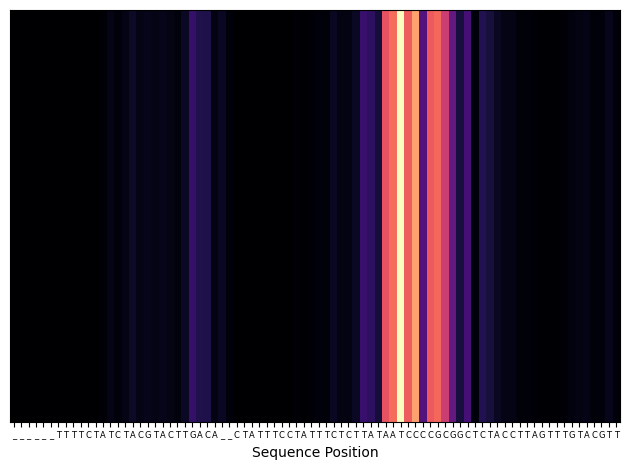

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load your CNN model
model = tf.keras.models.load_model('CNN_no_early.keras')

# Function to generate saliency map for DNA sequence
def generate_saliency_map(model, input_sequence, target_class_index):
    input_tensor = tf.convert_to_tensor(input_sequence[np.newaxis, ...], dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        loss = predictions[0, target_class_index]
        
    gradients = tape.gradient(loss, input_tensor)
    
    # Normalize gradients
    gradients = tf.norm(gradients, axis=-1)
    gradients = gradients / tf.reduce_max(gradients)
    
    return gradients.numpy()


target_class_index = 0
saliency = generate_saliency_map(model, input_sequence, target_class_index)

mapping = {(1,0,0,0) : 'A', (0,1,0,0) : 'C', (0,0,1,0) : 'G', (0,0,0,1) : 'T', (0,0,0,0) : '_'}
x_labels = [mapping[tuple(each)] for each in input_sequence]

plt.imshow(saliency, cmap='magma', aspect='auto')
plt.xlabel('Sequence Position')
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=6)
plt.yticks([])

plt.tight_layout()
plt.show()
